In [4]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [5]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [6]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [7]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [44]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Romance' in data[key]['genre'] and 'Comedy' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1972, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 5).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']

In [45]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1972: 2, 1973: 9, 1974: 2, 1975: 4, 1976: 2, 1977: 4, 1978: 8, 1979: 11, 1980: 2, 1981: 3, 1982: 6, 1983: 10, 1984: 20, 1985: 13, 1986: 13, 1987: 15, 1988: 23, 1989: 15, 1990: 15, 1991: 18, 1992: 16, 1993: 18, 1994: 22, 1995: 21, 1996: 18, 1997: 21, 1998: 22, 1999: 36, 2000: 26, 2001: 33, 2002: 43, 2003: 25, 2004: 27, 2005: 31, 2006: 30, 2007: 39, 2008: 48, 2009: 33, 2010: 34, 2011: 22, 2012: 27, 2013: 11, 2014: 2, 2015: 3, 2016: 1}})

In [46]:
history_df

,count,rolling mean,difference from mean
1972,2,NaN,NaN
1973,9,NaN,NaN
1974,2,NaN,NaN
1975,4,NaN,NaN
1976,2,NaN,NaN
1977,4,3.8,1.052632
1978,8,4.2,1.904762
1979,11,4.0,2.750000
1980,2,5.8,0.344828
1981,3,5.4,0.555556


In [47]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Romance' in data[key]['genre'] and 'Comedy' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [48]:
history_dic

defaultdict(<type 'dict'>, {1972: {'The Life and Times of Judge Roy Bean': defaultdict(<type 'dict'>, {'date': '18 December 1972', 'screens': 'Error', 'opening': 'N/A'}), 'Avanti!': defaultdict(<type 'dict'>, {'date': '17 December 1972', 'screens': 'Error', 'opening': 'N/A'})}, 1973: {'The Harrad Experiment': defaultdict(<type 'dict'>, {'date': '11 May 1973', 'screens': 'Error', 'opening': 'N/A'}), 'The Heartbreak Kid': defaultdict(<type 'dict'>, {'date': '1 February 1973', 'screens': 'Error', 'opening': 'N/A'}), "The World's Greatest Athlete": defaultdict(<type 'dict'>, {'date': '14 February 1973', 'screens': 'Error', 'opening': 'N/A'}), 'A Touch of Class': defaultdict(<type 'dict'>, {'date': '9 August 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Day for Night': defaultdict(<type 'dict'>, {'date': '7 September 1973', 'screens': '1', 'opening': 17808}), 'American Graffiti': defaultdict(<type 'dict'>, {'date': '1 August 1973', 'screens': 'n/a', 'opening': 'n/a'}), 'Carry on Girls': d

In [49]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 30000]
    return genre

In [50]:
genre=makedf(history_dic)
pd.set_option('display.max_rows', 1000)
genre1 = genre[genre.screens > 50]
genre1 = genre1.reset_index()
genre1

,level_0,level_1,date,screens,opening,normalized_opening
0,1978,Heaven Can Wait,1978-06-28,540,3652486,6763.862963
1,1979,10,1979-10-05,706,3526692,4995.314448
2,1981,Arthur,1981-07-17,701,2719534,3879.506419
3,1981,Back Roads,1981-03-13,805,3046339,3784.272050
4,1981,Continental Divide,1981-09-18,864,3218347,3724.938657
5,1982,Best Friends,1982-12-17,1062,4022891,3788.032957
6,1982,Kiss Me Goodbye,1982-12-22,783,1345672,1718.610473
7,1982,The Last American Virgin,1982-07-30,158,527198,3336.696203
8,1982,Tootsie,1982-12-17,943,5540470,5875.365854
9,1983,Lovesick,1983-02-18,718,3093281,4308.190808


In [79]:
trend = genre1[262:339]
trend = trend[trend.screens > 3000]
trend

,level_0,level_1,date,screens,opening,normalized_opening
270,2002,Mr. Deeds,2002-06-28,3231,37162787,11501.945837
274,2002,Sweet Home Alabama,2002-09-27,3293,35648740,10825.611904
281,2003,American Wedding,2003-08-01,3172,33369440,10520.000000
297,2004,13 Going on 30,2004-04-23,3438,21054283,6123.991565
298,2004,50 First Dates,2004-02-13,3591,39852237,11097.810359
306,2004,Meet the Fockers,2004-12-22,3518,46120980,13110.000000
314,2004,The Princess Diaries 2: Royal Engagement,2004-08-11,3472,22956453,6611.881624
319,2005,Bewitched,2005-06-24,3174,20131130,6342.511027
322,2005,Guess Who,2005-03-25,3147,20671446,6568.619638
323,2005,Hitch,2005-02-11,3575,43142214,12067.752168


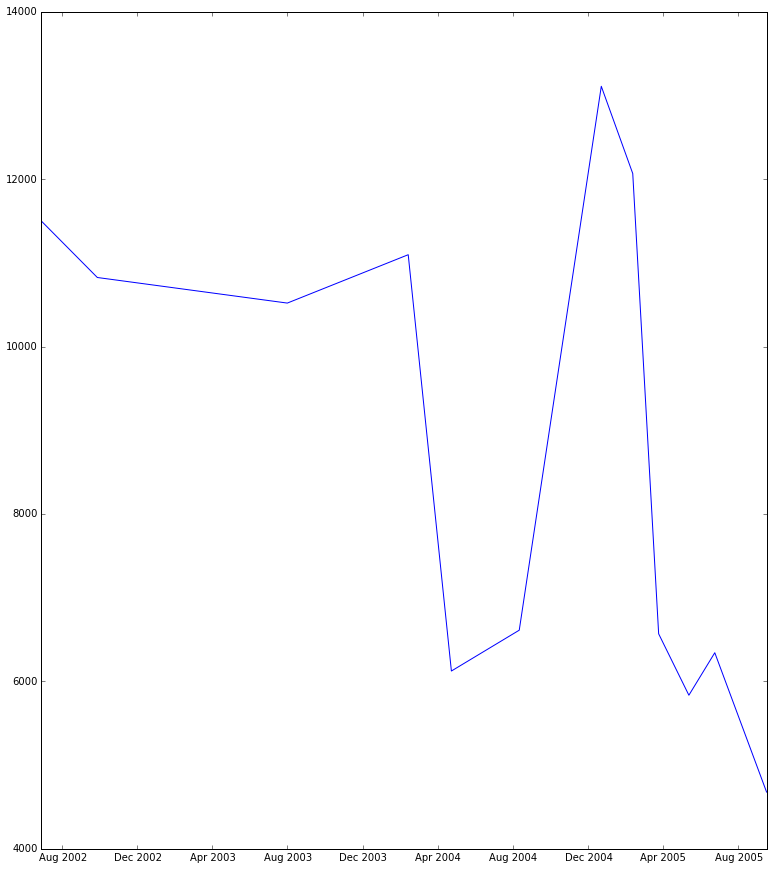

In [80]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

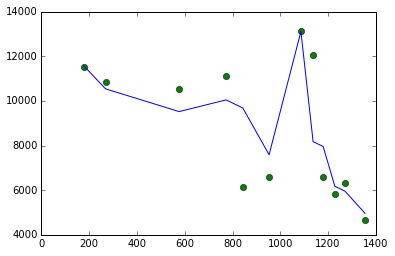

In [81]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2002-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 'Winter'
    if x in [5, 6, 7, 8]:
        return 'Summer'
    if x in [9, 10,]:
        return 'Fall'
    if x in [2, 3, 4,]:
        return 'Spring'
    
trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



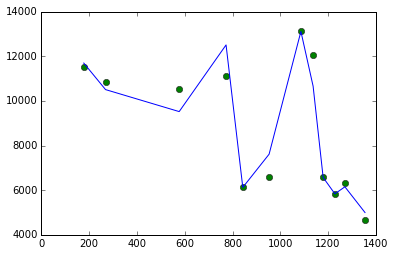

In [82]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2002-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x == 1:
        return 'January'
    if x == 2:
        return 'February'
    if x == 3:
        return 'March'
    if x == 4:
        return 'April'
    if x == 5:
        return 'May'
    if x == 6:
        return 'June'
    if x == 7:
        return 'July'
    if x == 8:
        return 'August'
    if x == 9:
        return 'September'
    if x == 10:
        return 'October'
    if x == 12:
        return 'November'
    if x == 12:
        return 'December'
    
    
     
trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')




In [84]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     5.486
Date:                Thu, 08 Oct 2015   Prob (F-statistic):             0.0945
Time:                        20:51:26   Log-Likelihood:                -96.004
No. Observations:                  12   AIC:                             210.0
Df Residuals:                       3   BIC:                             214.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept             1.04e+04   1789.426      5.814      0.010      4709.095  1.61e+04
season[T.August]     2045.9484   1770.095      1.156      0.331     -3587.284  7679.180
season[T.February]   6027.4062   1772.967      3.400      0.042       385.032  1.17e+04
season[T.June]       2194.0818   1773.686      1.237      0.304     -3450.578  7838.741
season[T.March]      2150.4777   2083.922      1.032      0.378     -4481.494  8782.449
season[T.May]        1665.6278   2097.235      0.794      0.485     -5008.709  8339.964
season[T.November]   8219.7032   2063.467      3.983      0.028      1652.829  1.48e+04
season[T.September]  1467.6478   1767.828      0.830      0.467     -4158.368  7093.664
time_delta_num         -5.0769      1.255     -4.045      0.027        -9.071    -1.082
==============================================================================
Omnibus:                        0.684   Durbin-Watson:                   2.366
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.001
Skew:                           0.000   Prob(JB):                         1.00
Kurtosis:                       3.045   Cond. No.                     9.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""